Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the data sets- train and test 
# Load the dataset
train_df = pd.read_csv("train.csv")

# Split the data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(train_df, test_size=0.2, random_state=42)

In [3]:
#Look at top values of train data 
print(train_data.head())

     PassengerId  Survived  Pclass                                Name  \
331          332         0       1                 Partner, Mr. Austen   
733          734         0       2          Berriman, Mr. William John   
382          383         0       3                  Tikkanen, Mr. Juho   
704          705         0       3             Hansen, Mr. Henrik Juul   
813          814         0       3  Andersson, Miss. Ebba Iris Alfrida   

        Sex   Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
331    male  45.5      0      0             113043  28.5000  C124        S  
733    male  23.0      0      0              28425  13.0000   NaN        S  
382    male  32.0      0      0  STON/O 2. 3101293   7.9250   NaN        S  
704    male  26.0      1      0             350025   7.8542   NaN        S  
813  female   6.0      4      2             347082  31.2750   NaN        S  


In [9]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
#Print the column names of train data

train_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
#Print the dimension of train and test data
print("dimensions of train data:",train_data.shape,"\n","dimensions of test_data:",test_data)

dimensions of train data: (712, 12) 
 dimensions of test_data:      PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
..           ...       ...     ...   
433          434         0       3   
773          774         0       3   
25            26         1       3   
84            85         1       2   
10            11         1       3   

                                                  Name     Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
..    

In [22]:
#Print the number of missing values in each column of train and test data
print("missing values in train data:", train_data.isnull().sum(),"\n","\n","\n",
      "Missing values of test data:", test_data.isnull().sum())

missing values in train data: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64 
 
 
 Missing values of test data: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64


## Data Visualization

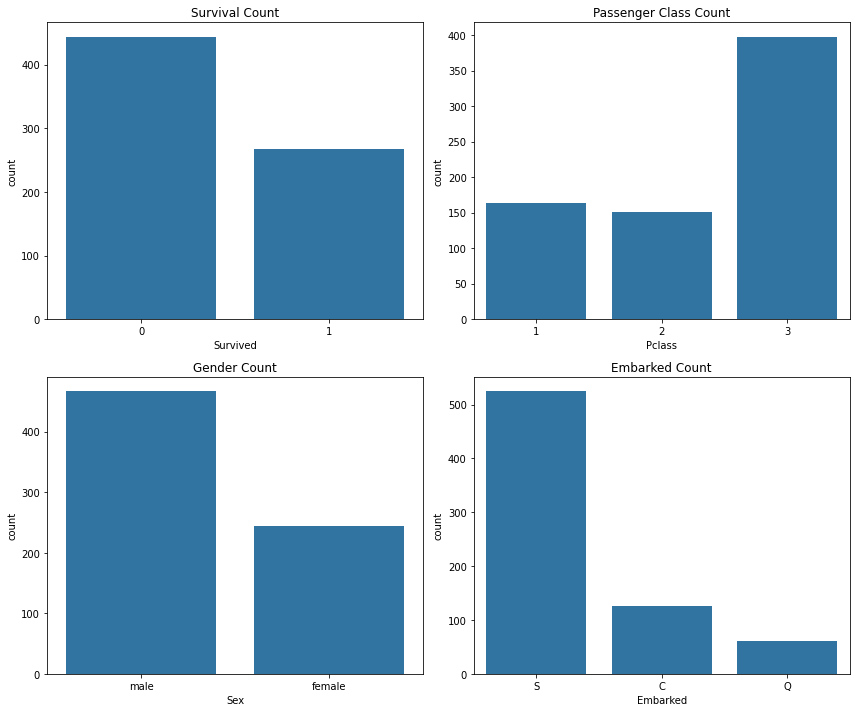

In [23]:
#Barchart of Survived, Pclass, Sex, Embarked
# Bar charts for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='Survived', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')
sns.countplot(x='Pclass', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Count')
sns.countplot(x='Sex', data=train_data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Count')
sns.countplot(x='Embarked', data=train_data, ax=axes[1, 1])
axes[1, 1].set_title('Embarked Count')
plt.tight_layout()
plt.show()


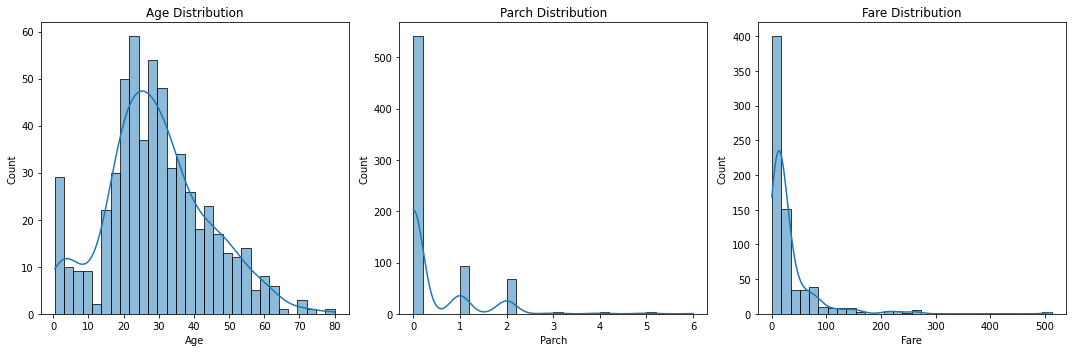

In [24]:
#Histogram of Age, Parch, Fare
# Histogram of Age, Parch, Fare
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train_data['Age'].dropna(), bins=30, ax=axes[0], kde=True)
axes[0].set_title('Age Distribution')
sns.histplot(train_data['Parch'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Parch Distribution')
sns.histplot(train_data['Fare'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Fare Distribution')
plt.tight_layout()
plt.show()


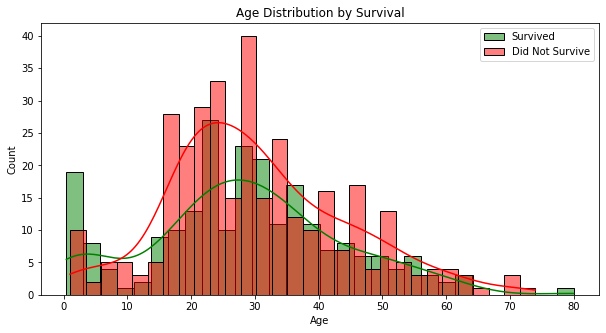

In [25]:
#Plot histogram of age for survived and did not survived class
# Plot histogram of Age for Survived and Not Survived classes
plt.figure(figsize=(10, 5))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins=30, color='green', label='Survived', kde=True)
sns.histplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins=30, color='red', label='Did Not Survive', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


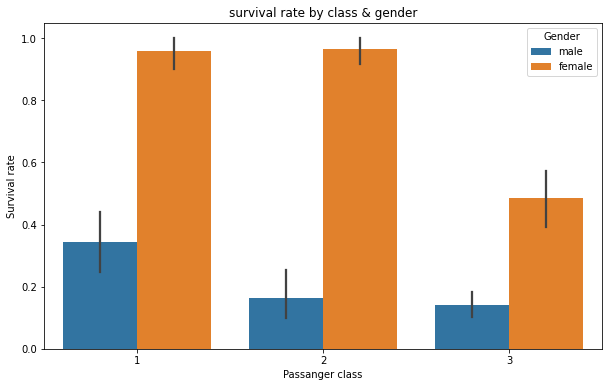

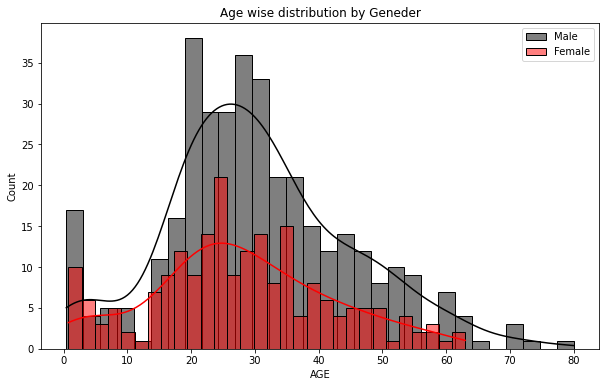

In [29]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
plt.figure(figsize=(10,6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data)
plt.title("survival rate by class & gender")
plt.xlabel("Passanger class")
plt.ylabel("Survival rate")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(train_data[train_data["Sex"]=="male"]["Age"].dropna(), bins=30, color="black", label="Male", kde=True)
sns.histplot(train_data[train_data["Sex"]=="female"]["Age"].dropna(), bins=30, color="red", label="Female", kde=True)
plt.xlabel("AGE")
plt.ylabel("Count")
plt.title("Age wise distribution by Geneder")
plt.legend()
plt.show()


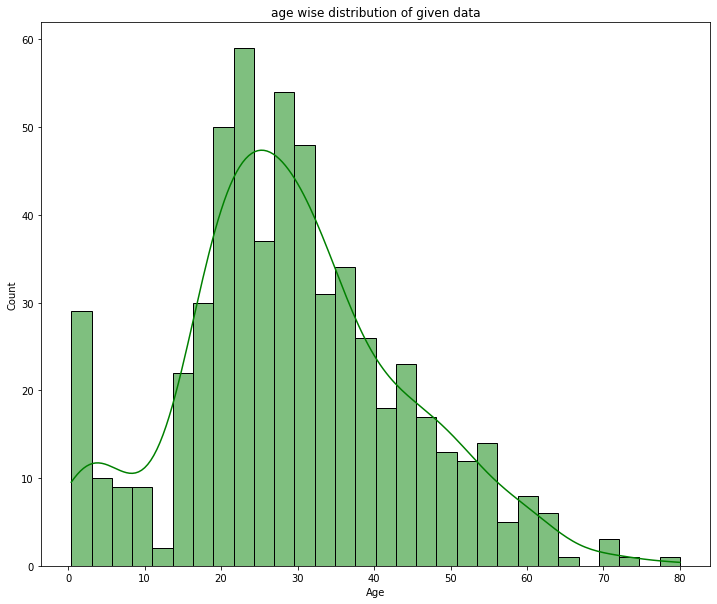

In [31]:
#Histogram of Age of the given data set(sample)
plt.figure(figsize=(12,10))
sns.histplot(train_data["Age"].dropna(), bins=30,color="green", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("age wise distribution of given data")
plt.show()

## Handling Missing Values

In [32]:
#Replace the msiing values in Embarked column by 'S'
train_data["Embarked"].fillna("S", inplace=True)
test_data["Embarked"].fillna("S", inplace=True)

In [33]:
#Impute the missing values in Fare column with median value
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [17]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

mean_age=train_data["Age"].mean()
std_age=train_data["Age"].std()
nan_count=train_data["Age"].isnull().sum()
train_data.loc[train_data["Age"].isnull(),"Age"]=np.random.normal(mean_age, std_age, nan_count)

## Feature Engineering - Creating new features

In [19]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

In [20]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [22]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

## Model Building

In [24]:
#Prepare X and y

In [ ]:
# Label encoding of categorical features


In [ ]:
# concat df_categorical with original df

In [ ]:
#Do a pairplot of all features

In [ ]:
X

In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

In [ ]:
#Print the tree

# Importing required packages for visualization


In [ ]:
# plotting tree with max_depth=3

<img src="tree2.png">

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy